In [9]:
import os
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
df1 = pd.read_csv('sa_play.csv') 
df1 = df1.drop(columns = ['Unnamed: 0', 'Date'])
df2 = pd.read_csv('sa_all(play).csv') 
df2 = df2.drop(columns = ['Unnamed: 0', 'Date'])
df = pd.concat([df1, df2], axis=0, join='outer')
df.head()

,Surgery,ASA,Emergency,Age,Height,BW,BMI,Gender,IBW,BSA,...,In_DBP,In_5_SBP,In_5_DBP,In_10_SBP,In_10_DBP,In_HR,In_5_HR,In_10_HR,In_Sat,SA_Arrthymia
0,OBS,1,No,34,158.0,48.0,19.23,Female,50.60,1.45,...,60,115,70,120,65,80,85,92,98,None
1,OBS,2,No,36,168.0,84.0,29.76,Female,59.70,1.98,...,90,159,82,102,58,85,80,68,97,None
2,GU,3,Yes,91,162.0,61.0,23.24,Male,58.74,1.66,...,83,172,83,160,65,62,60,59,100,None
3,GU,3,No,93,168.0,65.8,23.31,Male,64.20,1.75,...,45,112,50,100,51,68,65,60,97,None
4,Ortho,1,No,20,176.0,88.0,28.41,Male,71.48,2.07,...,60,110,65,110,55,60,45,55,98,None


In [3]:
feature_list = ['Surgery', 'ASA', 'Emergency', 'Age', 'Height', 'BW', 'BMI', 'Gender', 'IBW',
               'BSA', 'LBW', 'HTN', 'DM', 'Arrthymia', 'Pregnancy', 'Ankylosing_Spine',
               'Spine_OP_Hx', 'Anal_OP', 'CSF volume', 'Heavy_Plain', 'LA_dose', 'Fentanyl_dose',
               'Injection_Site', 'Needle_size', 'Needle_Bevel', 'Patient_Postition', 'Experience',
               'SA_Level_1st']

In [4]:
le = LabelEncoder()

In [5]:
X = df[feature_list].drop('SA_Level_1st', axis=1)
X = pd.get_dummies(X)
y = le.fit_transform(df['SA_Level_1st'])

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state= 20220216, stratify=y)

In [7]:
print("train_X維度:", train_X.shape)
print("test_X維度:", test_X.shape)
print("train_y筆數:", train_y.shape)
print("test_y筆數:", test_y.shape)

train_X維度: (3509, 59)
test_X維度: (878, 59)
train_y筆數: (3509,)
test_y筆數: (878,)


In [11]:
lr = LogisticRegression(C=1e5, multi_class='ovr')
lr.fit(train_X, train_y)

C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=100000.0, multi_class='ovr')

In [13]:
predict = lr.predict(test_X)
predict

array([5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 4, 5, 5, 6, 4, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 4,
       5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4,
       5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5, 5, 4,
       5, 5, 5, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5,
       5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 2, 6, 5, 4, 4, 5, 4, 5, 5, 4, 4,
       5, 5, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5,
       5, 4, 4, 5, 5, 5, 5, 5, 2, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 4,
       4, 5, 4, 4, 4, 2, 4, 4, 2, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5,
       4, 4, 5, 5, 5, 4, 2, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 6, 5,
       5, 4, 4, 5, 4, 5, 2, 4, 4, 5, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5,
       5, 5, 6, 4, 5, 5, 2, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4,
       5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 5,

In [14]:
accuracy_score(predict, test_y)

0.4123006833712984

In [15]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.30      0.05      0.09       110
           3       0.00      0.00      0.00        10
           4       0.48      0.61      0.54       295
           5       0.36      0.58      0.44       293
           6       0.50      0.05      0.09       161

    accuracy                           0.41       878
   macro avg       0.23      0.18      0.17       878
weighted avg       0.41      0.41      0.36       878



C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# 繪製混淆矩陣
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm : 計算出的混淆矩陣的值
    - classes : 混淆矩阵中每一列每一行對應的行
    - normalize : True:顯示百分比, False:顯示個數
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("顯示百分比：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        print(cm)
    else:
        print('顯示具體數字：')
        print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # matplotlib版本問題，如果不加下面這行Code，則繪製的混淆矩陣上下只能顯示一半，有的版本的matplotlib不需要下面的Code，需試一下即可
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

顯示具體數字：
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  1   0   6   3   1   4   5]
 [  0   0   0   0   0   0   0]
 [  3   0  26   2 179 115  46]
 [  4   1  76   5 114 169 102]
 [  0   0   2   0   1   5   8]]


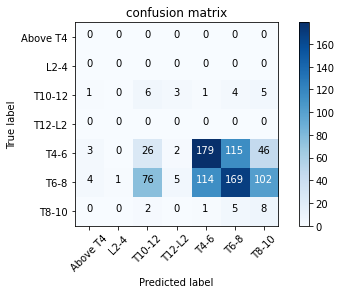

In [17]:
classes = ['Above T4', 'L2-4', 'T10-12', 'T12-L2', 'T4-6', 'T6-8', 'T8-10']
cm = confusion_matrix(predict, test_y)
plot_confusion_matrix(cm, classes=classes, normalize=False, title='confusion matrix')